In [496]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import re

In [497]:
df = pd.read_excel(
    "/workspaces/codespace-repo/Operacoes_nao_realizadas.xlsx", sheet_name="AÇÕES"
)

In [498]:
df

,TICK,DATA,W \ L,BUY \ SELL,TEMPO GRAF.,GANHO,TIPO
0,PETR4,2021-11-25 00:00:00,W,BUY,15 MIN,0.0194,DT
1,VALE3,2021-11-30 00:00:00,W,BUY,15 MIN,0.0220,DT
2,ITUB4,2021-11-30 00:00:00,W,BUY,15 MIN,0.0054,DT
3,ABEV3,2021-11-30 00:00:00,W,BUY,15 MIN,0.0086,DT
4,BBDC4,2021-11-30 00:00:00,W,BUY,15 MIN,0.0075,DT
...,...,...,...,...,...,...,...
263,BBAS3,2023-01-05 00:00:00,W,BUY,15 MIN,0.0081,DT
264,ITUB4,2023-01-05 00:00:00,W,BUY,15 MIN,0.0091,DT
265,PETR4,2023-01-05 00:00:00,W,BUY,15 MIN,0.0185,DT
266,VALE3,2023-01-05 00:00:00,W,BUY,15 MIN,0.0169,DT


In [499]:
df.rename(
    columns={
        "TICK": "ticker",
        "DATA": "data",
        "W \ L": "win_loss",
        "BUY \ SELL": "buy_sell",
        "TEMPO GRAF.": "time",
        "GANHO": "percentage",
        "TIPO": "type",
    },
    inplace=True,
)

In [500]:
df

,ticker,data,win_loss,buy_sell,time,percentage,type
0,PETR4,2021-11-25 00:00:00,W,BUY,15 MIN,0.0194,DT
1,VALE3,2021-11-30 00:00:00,W,BUY,15 MIN,0.0220,DT
2,ITUB4,2021-11-30 00:00:00,W,BUY,15 MIN,0.0054,DT
3,ABEV3,2021-11-30 00:00:00,W,BUY,15 MIN,0.0086,DT
4,BBDC4,2021-11-30 00:00:00,W,BUY,15 MIN,0.0075,DT
...,...,...,...,...,...,...,...
263,BBAS3,2023-01-05 00:00:00,W,BUY,15 MIN,0.0081,DT
264,ITUB4,2023-01-05 00:00:00,W,BUY,15 MIN,0.0091,DT
265,PETR4,2023-01-05 00:00:00,W,BUY,15 MIN,0.0185,DT
266,VALE3,2023-01-05 00:00:00,W,BUY,15 MIN,0.0169,DT


In [501]:
text = "15 MIN"
new_text = re.sub("\D", "", text)
print(new_text)

15


In [502]:
df.time.unique()

array(['15 MIN', 'SEMANAL', '5 MIN'], dtype=object)

In [503]:
df.time = df.time.apply(lambda x: 10080 if x == "SEMANAL" else re.sub("\D", "", x))

In [504]:
df.time.unique()

array(['15', 10080, '5'], dtype=object)

In [505]:
df.win_loss = df.win_loss.apply(lambda x: re.sub("\s", "", x))

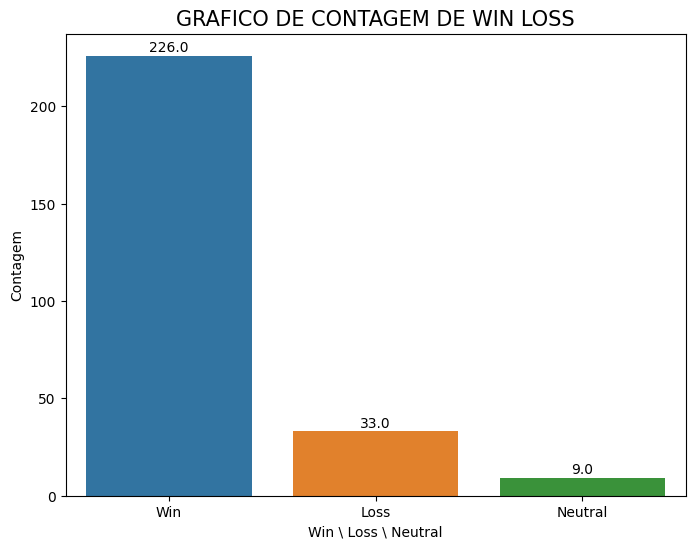

In [506]:
plt.figure(figsize=(8, 6))
plt.title("GRAFICO DE CONTAGEM DE WIN LOSS", fontsize=15)

ax = sns.countplot(data=df, x="win_loss")

plt.xlabel(xlabel="Win \ Loss \ Neutral")
plt.ylabel(ylabel="Contagem")

for patch in ax.patches:
    y_value = patch.get_height()
    x_value = patch.get_x() + patch.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords="offset points",
        ha="center",
        va="bottom",
    )

plt.xticks(ticks=[0, 1, 2], labels=["Win", "Loss", "Neutral"]);

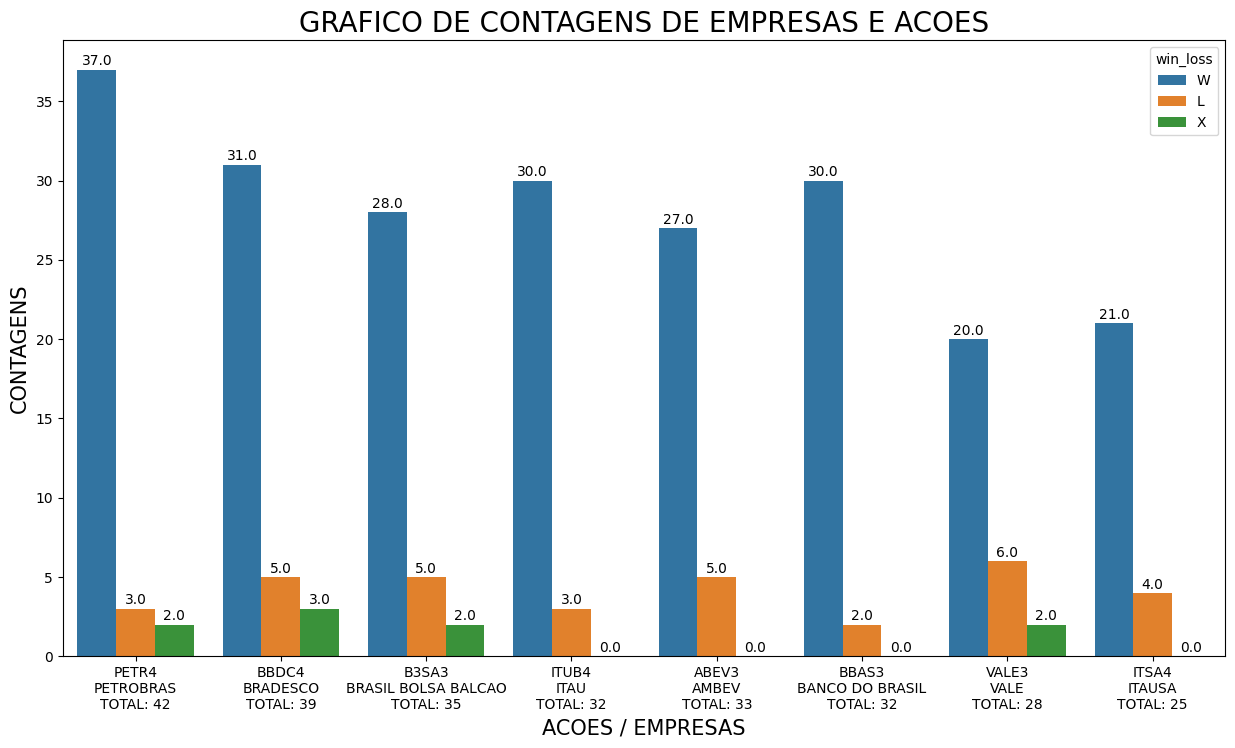

In [507]:
petrobras = df[df.ticker == "PETR4"].ticker.value_counts().sum()
bradesco = df[df.ticker == "BBDC4"].ticker.value_counts().sum()
brasil_bolsa_balcao = df[df.ticker == "B3SA3"].ticker.value_counts().sum()
itau = df[df.ticker == "ITUB4"].ticker.value_counts().sum()
ambev = df[df.ticker == "ABEV3"].ticker.value_counts().sum()
banco_do_brasil = df[df.ticker == "BBAS3"].ticker.value_counts().sum()
vale = df[df.ticker == "VALE3"].ticker.value_counts().sum()
itausa = df[df.ticker == "ITSA4"].ticker.value_counts().sum()


plt.figure(figsize=(15, 8))
plt.title("GRAFICO DE CONTAGENS DE EMPRESAS E ACOES", fontsize=20)


ax = sns.countplot(
    data=df, x="ticker", hue=df.win_loss, order=df.ticker.value_counts().index
)

for patch in ax.patches:
    y_value = patch.get_height()
    x_value = patch.get_x() + patch.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords="offset points",
        ha="center",
        va="bottom",
    )

plt.xlabel(xlabel="ACOES / EMPRESAS", fontsize=15)
plt.ylabel(ylabel="CONTAGENS", fontsize=15)

plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5, 6, 7],
    labels=[
        f"PETR4\nPETROBRAS\nTOTAL: {petrobras}",
        f"BBDC4\nBRADESCO\nTOTAL: {bradesco}",
        f"B3SA3\nBRASIL BOLSA BALCAO\nTOTAL: {brasil_bolsa_balcao}",
        f"ITUB4\nITAU\nTOTAL: {itau}",
        f"ABEV3\nAMBEV\nTOTAL: {ambev}",
        f"BBAS3\nBANCO DO BRASIL\nTOTAL: {banco_do_brasil}",
        f"VALE3\nVALE\nTOTAL: {vale}",
        f"ITSA4\nITAUSA\nTOTAL: {itausa}",
    ],
);

In [508]:
df[df.ticker == "PETR4"].ticker.value_counts().sum()

42

In [509]:
df

,ticker,data,win_loss,buy_sell,time,percentage,type
0,PETR4,2021-11-25 00:00:00,W,BUY,15,0.0194,DT
1,VALE3,2021-11-30 00:00:00,W,BUY,15,0.0220,DT
2,ITUB4,2021-11-30 00:00:00,W,BUY,15,0.0054,DT
3,ABEV3,2021-11-30 00:00:00,W,BUY,15,0.0086,DT
4,BBDC4,2021-11-30 00:00:00,W,BUY,15,0.0075,DT
...,...,...,...,...,...,...,...
263,BBAS3,2023-01-05 00:00:00,W,BUY,15,0.0081,DT
264,ITUB4,2023-01-05 00:00:00,W,BUY,15,0.0091,DT
265,PETR4,2023-01-05 00:00:00,W,BUY,15,0.0185,DT
266,VALE3,2023-01-05 00:00:00,W,BUY,15,0.0169,DT


In [510]:
# df.percentage = df.percentage.apply(lambda x: re.sub(",", ".", x))
df.percentage = df.percentage.apply(lambda x: x * 100)

In [511]:
# df.percentage = df.percentage.apply(lambda x: re.sub("%", "", x))

In [512]:
df

,ticker,data,win_loss,buy_sell,time,percentage,type
0,PETR4,2021-11-25 00:00:00,W,BUY,15,1.94,DT
1,VALE3,2021-11-30 00:00:00,W,BUY,15,2.20,DT
2,ITUB4,2021-11-30 00:00:00,W,BUY,15,0.54,DT
3,ABEV3,2021-11-30 00:00:00,W,BUY,15,0.86,DT
4,BBDC4,2021-11-30 00:00:00,W,BUY,15,0.75,DT
...,...,...,...,...,...,...,...
263,BBAS3,2023-01-05 00:00:00,W,BUY,15,0.81,DT
264,ITUB4,2023-01-05 00:00:00,W,BUY,15,0.91,DT
265,PETR4,2023-01-05 00:00:00,W,BUY,15,1.85,DT
266,VALE3,2023-01-05 00:00:00,W,BUY,15,1.69,DT


In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ticker      266 non-null    object 
 1   data        268 non-null    object 
 2   win_loss    268 non-null    object 
 3   buy_sell    268 non-null    object 
 4   time        268 non-null    object 
 5   percentage  268 non-null    float64
 6   type        268 non-null    object 
dtypes: float64(1), object(6)
memory usage: 14.8+ KB


In [514]:
df.percentage = df.percentage.astype(float)

In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ticker      266 non-null    object 
 1   data        268 non-null    object 
 2   win_loss    268 non-null    object 
 3   buy_sell    268 non-null    object 
 4   time        268 non-null    object 
 5   percentage  268 non-null    float64
 6   type        268 non-null    object 
dtypes: float64(1), object(6)
memory usage: 14.8+ KB


In [516]:
df.data = df.data.apply(lambda x: str(x))
df.data = df.data.apply(lambda x: "2021-11-25 00:00:00" if "até" in x else x)  # arrumar
df.data = df.data.apply(lambda x: re.sub(":", "", x))
df.data = df.data.apply(lambda x: re.sub(" ", "", x))
df.data = df.data.apply(lambda x: x[:-6])
df.data = df.data.apply(lambda x: re.sub("-", "/", x))
df.data = df.data.apply(
    lambda x: datetime.strptime(str(x), f"%Y/%m/%d").strftime(f"%d/%m/%Y")
)

In [517]:
df

,ticker,data,win_loss,buy_sell,time,percentage,type
0,PETR4,25/11/2021,W,BUY,15,1.94,DT
1,VALE3,30/11/2021,W,BUY,15,2.20,DT
2,ITUB4,30/11/2021,W,BUY,15,0.54,DT
3,ABEV3,30/11/2021,W,BUY,15,0.86,DT
4,BBDC4,30/11/2021,W,BUY,15,0.75,DT
...,...,...,...,...,...,...,...
263,BBAS3,05/01/2023,W,BUY,15,0.81,DT
264,ITUB4,05/01/2023,W,BUY,15,0.91,DT
265,PETR4,05/01/2023,W,BUY,15,1.85,DT
266,VALE3,05/01/2023,W,BUY,15,1.69,DT


In [518]:
wins = df[df.win_loss == "W"]

In [519]:
wins

,ticker,data,win_loss,buy_sell,time,percentage,type
0,PETR4,25/11/2021,W,BUY,15,1.94,DT
1,VALE3,30/11/2021,W,BUY,15,2.20,DT
2,ITUB4,30/11/2021,W,BUY,15,0.54,DT
3,ABEV3,30/11/2021,W,BUY,15,0.86,DT
4,BBDC4,30/11/2021,W,BUY,15,0.75,DT
...,...,...,...,...,...,...,...
263,BBAS3,05/01/2023,W,BUY,15,0.81,DT
264,ITUB4,05/01/2023,W,BUY,15,0.91,DT
265,PETR4,05/01/2023,W,BUY,15,1.85,DT
266,VALE3,05/01/2023,W,BUY,15,1.69,DT


In [520]:
round(wins.percentage.mean(), 2)

1.28

In [521]:
loss = df[df.win_loss == "L"]

In [522]:
loss.head(5)

,ticker,data,win_loss,buy_sell,time,percentage,type
8,PETR4,15/12/2021,L,BUY,15,-0.20,DT
29,ABEV3,31/01/2022,L,BUY,15,-0.42,DT
34,ITSA4,14/02/2022,L,SELL,5,0.39,DT
39,ABEV3,21/02/2022,L,SELL,15,-0.61,DT
40,VALE3,21/02/2022,L,BUY,15,-0.70,DT


In [523]:
loss.percentage = loss.percentage.apply(lambda x: x * -1 if (x > 0) else x)

/tmp/ipykernel_12249/2876892252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss.percentage = loss.percentage.apply(lambda x: x * -1 if (x > 0) else x)


In [524]:
loss.head(5)

,ticker,data,win_loss,buy_sell,time,percentage,type
8,PETR4,15/12/2021,L,BUY,15,-0.20,DT
29,ABEV3,31/01/2022,L,BUY,15,-0.42,DT
34,ITSA4,14/02/2022,L,SELL,5,-0.39,DT
39,ABEV3,21/02/2022,L,SELL,15,-0.61,DT
40,VALE3,21/02/2022,L,BUY,15,-0.70,DT


In [525]:
round(loss.percentage.mean(), 2)

-0.62

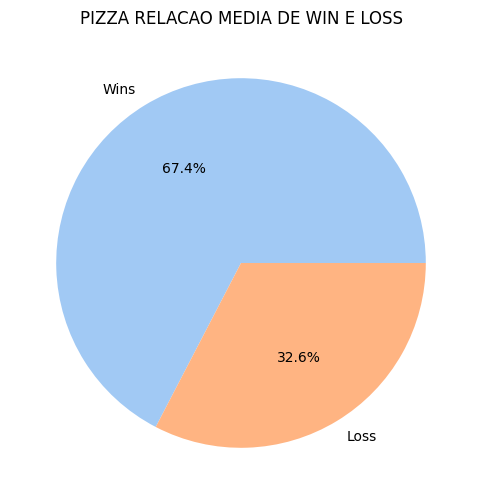

In [526]:
plt.figure(figsize=(7, 6))
plt.title("PIZZA RELACAO MEDIA DE WIN E LOSS")

colors = sns.color_palette("pastel")[0:3]
plt.pie([1.28, 0.62], labels=["Wins", "Loss"], colors=colors, autopct="%.1f%%");

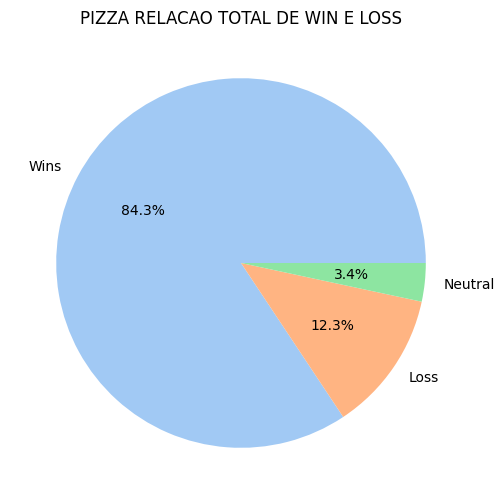

In [527]:
plt.figure(figsize=(7, 6))
plt.title("PIZZA RELACAO TOTAL DE WIN E LOSS")


colors = sns.color_palette("pastel")[0:3]
plt.pie(
    df.win_loss.value_counts(),
    labels=["Wins", "Loss", "Neutral"],
    colors=colors,
    autopct="%.1f%%",
);